In [1]:
import pandas as pd
import numpy as np
import os,sys

In [2]:
import glob

In [3]:
path = os.getcwd()

In [4]:
path

'C:\\Users\\Yao\\Radix_assignment'

In [5]:
files = glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2014*","*csv"))
files.extend(glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2015*","*csv")))
files.extend(glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2016*","*csv")))

In [6]:
df = pd.DataFrame()
for f in files:
    try:
        if df.empty:
            df = pd.read_csv(f)
        else:
            df = pd.concat([df,pd.read_csv(f)])
    except Exception as e:
        print (f"Error reading {f}. Message is: {e}")

Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20140101-20141231\beijing_all_20141231.csv. Message is: Error tokenizing data. C error: Expected 3 fields in line 34, saw 5

Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_all_20161230.csv. Message is: No columns to parse from file
Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_all_20161231.csv. Message is: No columns to parse from file
Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_extra_20161230.csv. Message is: No columns to parse from file
Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_extra_20161231.csv. Message is: No columns to parse from file


In [7]:
df['Datetime'] = pd.to_datetime(df['date'],format='%Y%m%d')+pd.to_timedelta(df['hour'].astype(int), unit='H')

In [8]:
df = df.set_index('Datetime')

In [9]:
df = df.drop(columns=['date','hour'])

In [10]:
df

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,PM2.5,35.0,32.0,45.0,66.0,20.0,31.0,57.0,22.0,17.0,...,NaN,21.0,110.0,90.0,136.0,75.0,66.0,35.0,84.0,45.0
2014-01-01 00:00:00,PM2.5_24h,53.0,50.0,53.0,59.0,51.0,51.0,65.0,39.0,32.0,...,NaN,53.0,112.0,143.0,148.0,74.0,62.0,50.0,68.0,43.0
2014-01-01 00:00:00,PM10,114.0,110.0,151.0,175.0,90.0,117.0,152.0,70.0,62.0,...,NaN,53.0,169.0,92.0,323.0,147.0,182.0,112.0,175.0,172.0
2014-01-01 00:00:00,PM10_24h,131.0,124.0,147.0,151.0,221.0,153.0,174.0,115.0,109.0,...,NaN,128.0,199.0,120.0,290.0,NaN,150.0,131.0,128.0,158.0
2014-01-01 00:00:00,AQI,91.0,87.0,99.0,101.0,136.0,102.0,112.0,83.0,80.0,...,61.0,89.0,146.0,190.0,197.0,99.0,100.0,91.0,92.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-29 09:00:00,NO2_24h,30.0,34.0,42.0,38.0,33.0,33.0,42.0,32.0,14.0,...,5.0,NaN,63.0,45.0,NaN,45.0,45.0,52.0,51.0,27.0
2016-12-29 09:00:00,O3,30.0,2.0,16.0,31.0,28.0,24.0,8.0,27.0,28.0,...,41.0,NaN,19.0,4.0,NaN,23.0,15.0,32.0,8.0,13.0
2016-12-29 09:00:00,O3_24h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Question: Do we need to remove all pollutants with suffix '_24h'?
pollutant = set(df.type)
pollutant.remove('AQI')

In [12]:
pollutant = [p for p in pollutant if '24h' not in p]

In [13]:
pollutant

['CO', 'PM10', 'NO2', 'SO2', 'PM2.5', 'O3']

In [14]:
df = df.loc[df['type'].isin(pollutant)]

In [15]:
df.loc[df['type']=='PM2.5']

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,PM2.5,35.0,32.0,45.0,66.0,20.0,31.0,57.0,22.0,17.0,...,NaN,21.0,110.0,90.0,136.0,75.0,66.0,35.0,84.0,45.0
2014-01-01 01:00:00,PM2.5,66.0,56.0,57.0,72.0,43.0,58.0,68.0,22.0,25.0,...,14.0,14.0,116.0,122.0,181.0,87.0,68.0,56.0,85.0,46.0
2014-01-01 02:00:00,PM2.5,70.0,53.0,57.0,80.0,79.0,68.0,81.0,21.0,15.0,...,21.0,23.0,133.0,135.0,235.0,92.0,76.0,59.0,93.0,49.0
2014-01-01 03:00:00,PM2.5,71.0,64.0,64.0,89.0,82.0,83.0,95.0,20.0,13.0,...,NaN,34.0,159.0,146.0,224.0,93.0,89.0,67.0,102.0,57.0
2014-01-01 04:00:00,PM2.5,82.0,71.0,65.0,92.0,124.0,75.0,95.0,24.0,24.0,...,NaN,51.0,138.0,145.0,172.0,105.0,102.0,61.0,106.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-29 05:00:00,PM2.5,10.0,8.0,4.0,NaN,9.0,11.0,12.0,25.0,6.0,...,7.0,NaN,16.0,23.0,208.0,10.0,11.0,14.0,10.0,15.0
2016-12-29 06:00:00,PM2.5,8.0,5.0,10.0,3.0,8.0,8.0,13.0,26.0,8.0,...,5.0,NaN,15.0,29.0,189.0,8.0,11.0,16.0,10.0,11.0
2016-12-29 07:00:00,PM2.5,15.0,10.0,8.0,12.0,12.0,8.0,14.0,22.0,17.0,...,8.0,NaN,13.0,38.0,192.0,6.0,13.0,14.0,14.0,17.0


In [17]:
 df.loc[df['type']=='PM2.5'].isna().sum()

type       0
东四       771
天坛       879
官园       716
万寿西宫     917
奥体中心    1048
农展馆      798
万柳       595
北部新区    1323
植物园     1694
丰台花园    1025
云岗       808
古城       696
房山       772
大兴      1017
亦庄       842
通州      1226
顺义       833
昌平       932
门头沟      966
平谷       874
怀柔       908
密云       815
延庆       778
定陵       881
八达岭     3317
密云水库    1328
东高村     1120
永乐店     1203
榆垡      2318
琉璃河     1508
前门      1983
永定门内     820
西直门北    1445
南三环     1711
东四环     1204
dtype: int64

In [18]:
 df.isna().sum()

type        0
东四      12353
天坛      13315
官园      11323
万寿西宫    11845
奥体中心    14748
农展馆     11774
万柳      12286
北部新区    15134
植物园     15621
丰台花园    11835
云岗      10332
古城      10206
房山      13518
大兴      12424
亦庄      13758
通州      13010
顺义      16173
昌平      11132
门头沟     11112
平谷      13515
怀柔      14455
密云      12335
延庆      11942
定陵      12317
八达岭     25961
密云水库    15490
东高村     18267
永乐店     17870
榆垡      17477
琉璃河     15929
前门      17475
永定门内    12698
西直门北    13777
南三环     16096
东四环     13578
dtype: int64

In [24]:
#build a model for '万柳' first
subset = df.loc[:,['type','万柳']]

In [25]:
subset.sort_values(by = ['Datetime'])

,type,万柳
Datetime,,
2014-01-01 00:00:00,PM2.5,57.0
2014-01-01 00:00:00,PM10,152.0
2014-01-01 01:00:00,PM2.5,68.0
2014-01-01 01:00:00,PM10,179.0
2014-01-01 02:00:00,PM2.5,81.0
...,...,...
2016-12-29 09:00:00,NO2,63.0
2016-12-29 09:00:00,PM2.5,19.0
2016-12-29 09:00:00,O3,8.0


In [26]:
subset = subset.pivot_table(values='万柳', index=[df.index], columns='type').rename_axis(None,axis=1).reset_index().set_index('Datetime')

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Datetime'>

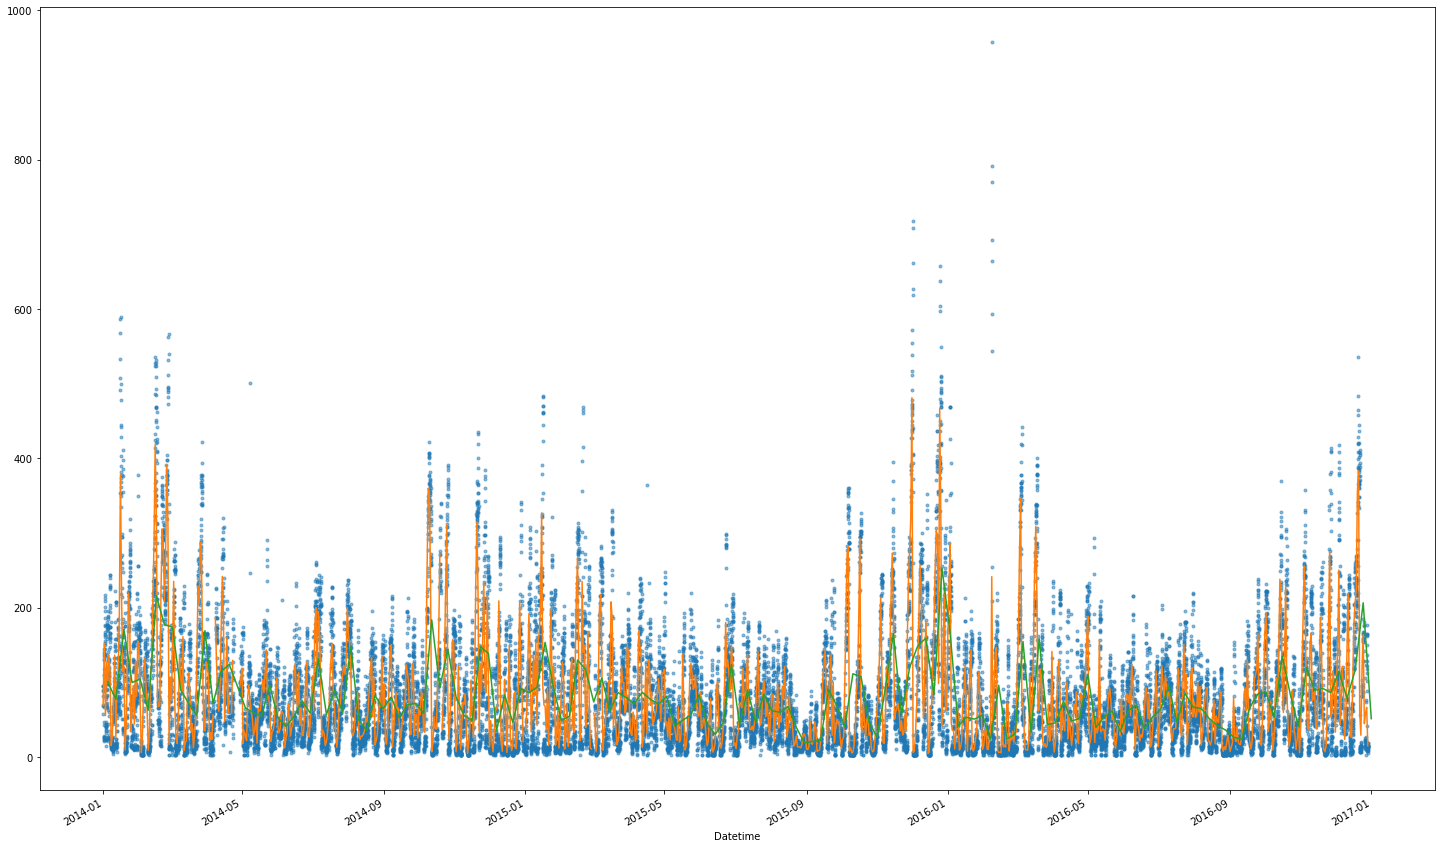

In [28]:
subset['PM2.5'].plot(marker='.', alpha=0.5, linestyle='None',figsize=(25, 16))
subset['PM2.5'].resample("D").mean().plot( label="Daily average")
subset['PM2.5'].resample("W").mean().plot( label="Weekly average")

<AxesSubplot:xlabel='Datetime'>

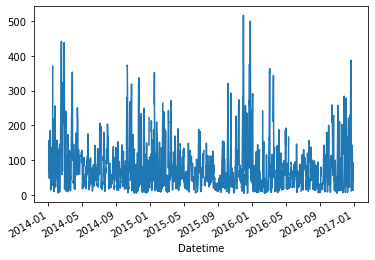

In [29]:
subset['PM2.5'].rolling(24).mean().plot( label="Rolling Window 24 hours")

In [1]:
sns.set(rc={'figure.figsize':(25,16)})
f, axes = plt.subplots(2, 3)
sns.boxplot(x=subset.index.month, y='PM2.5', data=subset, ax=axes[0][0])
sns.boxplot(x=subset.index.month, y='PM10', data=subset, ax=axes[0][1])
sns.boxplot(x=subset.index.month, y='SO2', data=subset, ax=axes[0][2])
sns.boxplot(x=subset.index.month, y='CO', data=subset, ax=axes[1][0])
sns.boxplot(x=subset.index.month, y='NO2', data=subset, ax=axes[1][1])
sns.boxplot(x=subset.index.month, y='O3', data=subset, ax=axes[1][2])

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='Datetime', ylabel='O3'>

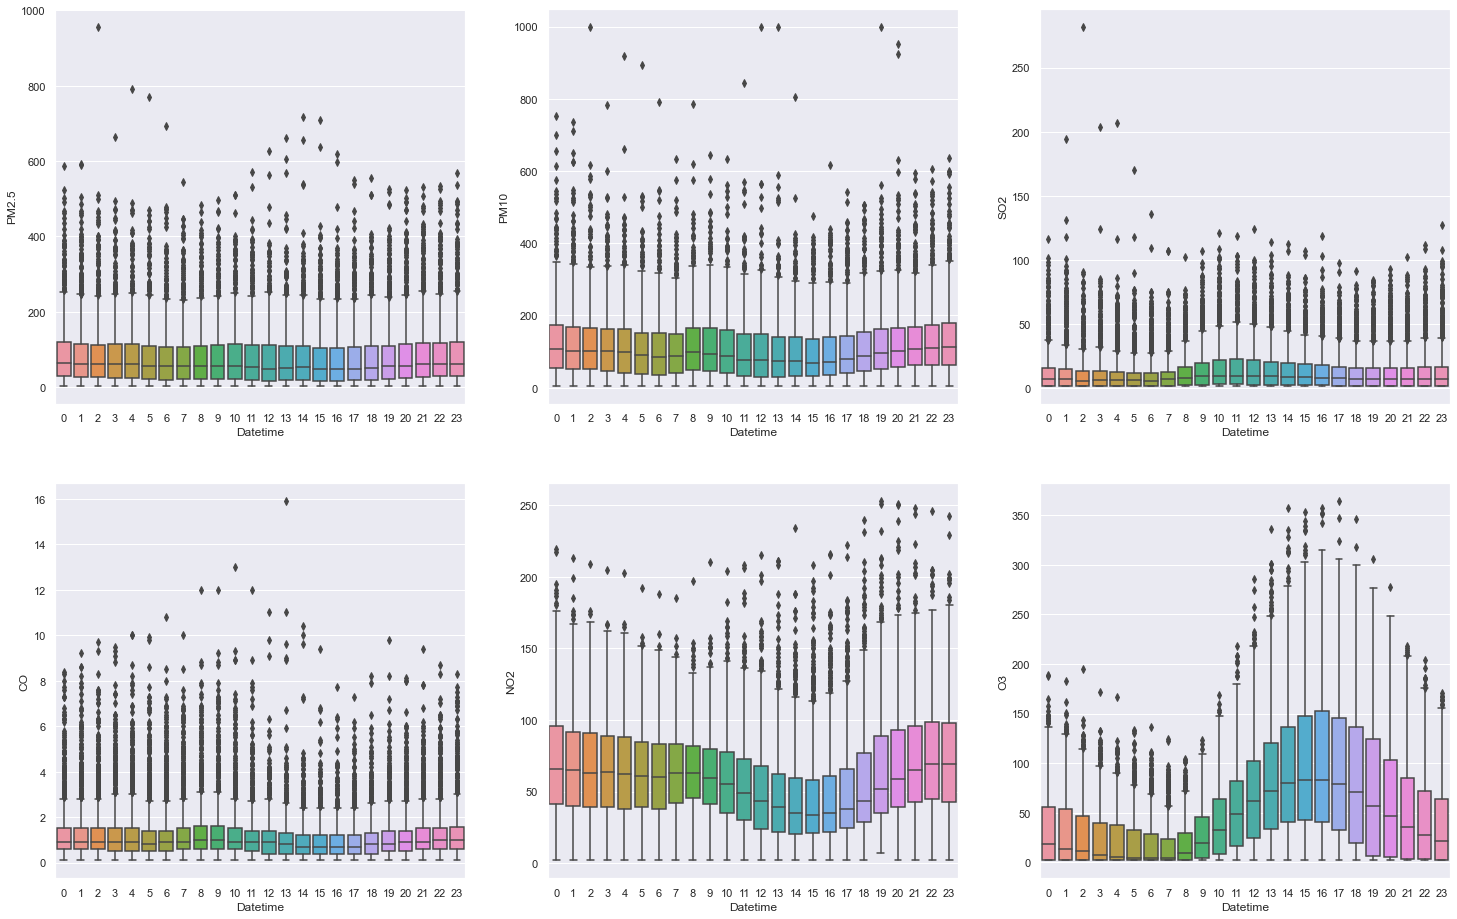

In [30]:
sns.set(rc={'figure.figsize':(25,16)})
f, axes = plt.subplots(2, 3)
sns.boxplot(x=subset.index.hour, y='PM2.5', data=subset, ax=axes[0][0])
sns.boxplot(x=subset.index.hour, y='PM10', data=subset, ax=axes[0][1])
sns.boxplot(x=subset.index.hour, y='SO2', data=subset, ax=axes[0][2])
sns.boxplot(x=subset.index.hour, y='CO', data=subset, ax=axes[1][0])
sns.boxplot(x=subset.index.hour, y='NO2', data=subset, ax=axes[1][1])
sns.boxplot(x=subset.index.hour, y='O3', data=subset, ax=axes[1][2])

<AxesSubplot:xlabel='Datetime', ylabel='O3'>

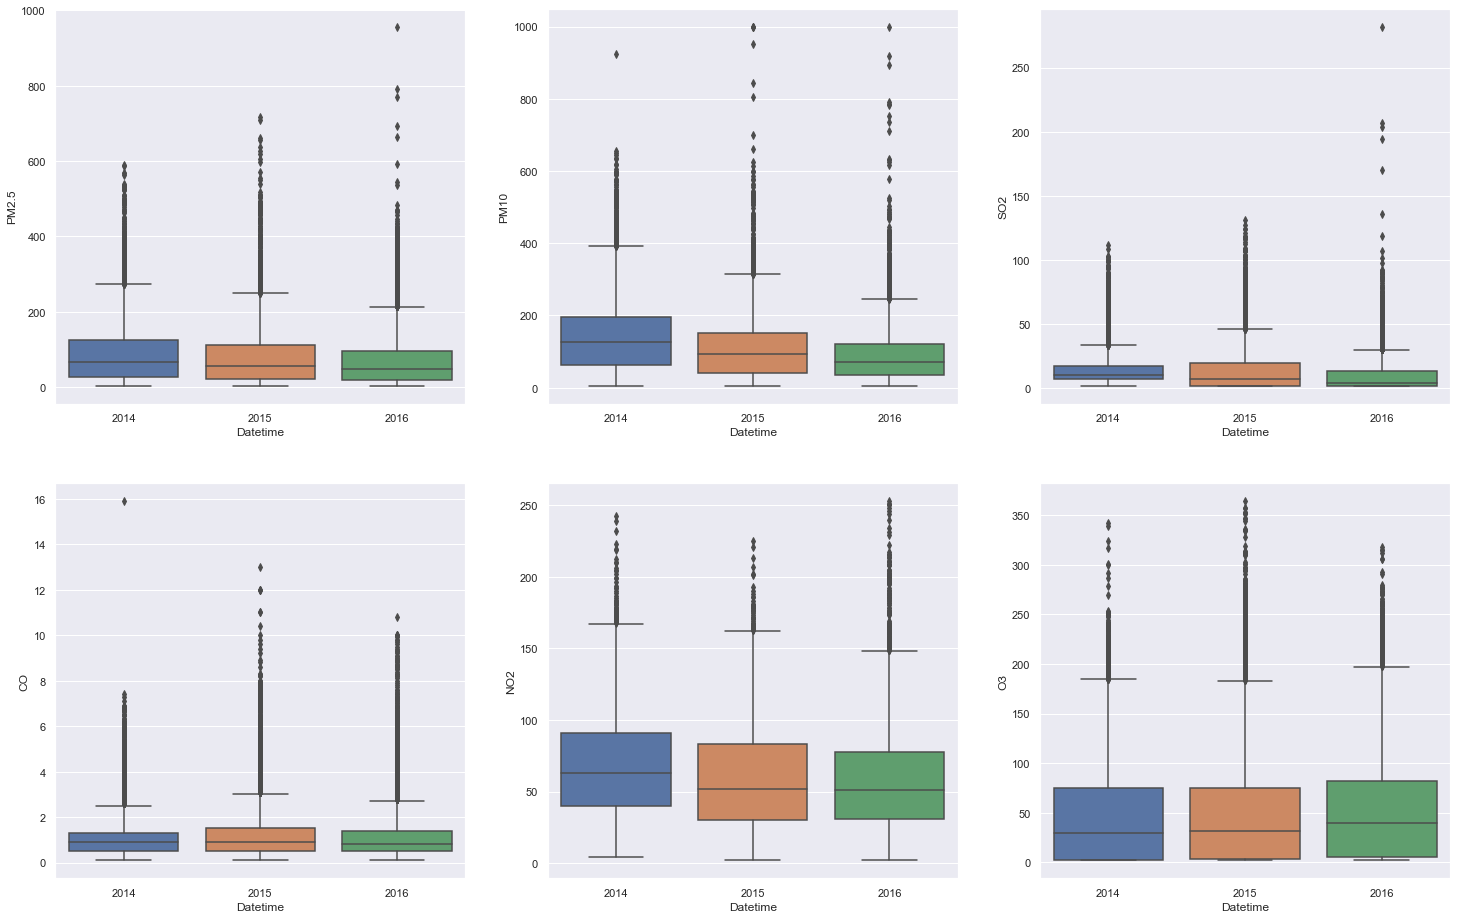

In [31]:
sns.set(rc={'figure.figsize':(25,16)})
f, axes = plt.subplots(2, 3)
sns.boxplot(x=subset.index.year, y='PM2.5', data=subset, ax=axes[0][0])
sns.boxplot(x=subset.index.year, y='PM10', data=subset, ax=axes[0][1])
sns.boxplot(x=subset.index.year, y='SO2', data=subset, ax=axes[0][2])
sns.boxplot(x=subset.index.year, y='CO', data=subset, ax=axes[1][0])
sns.boxplot(x=subset.index.year, y='NO2', data=subset, ax=axes[1][1])
sns.boxplot(x=subset.index.year, y='O3', data=subset, ax=axes[1][2])

In [220]:
from statsmodels.tsa.stattools import adfuller

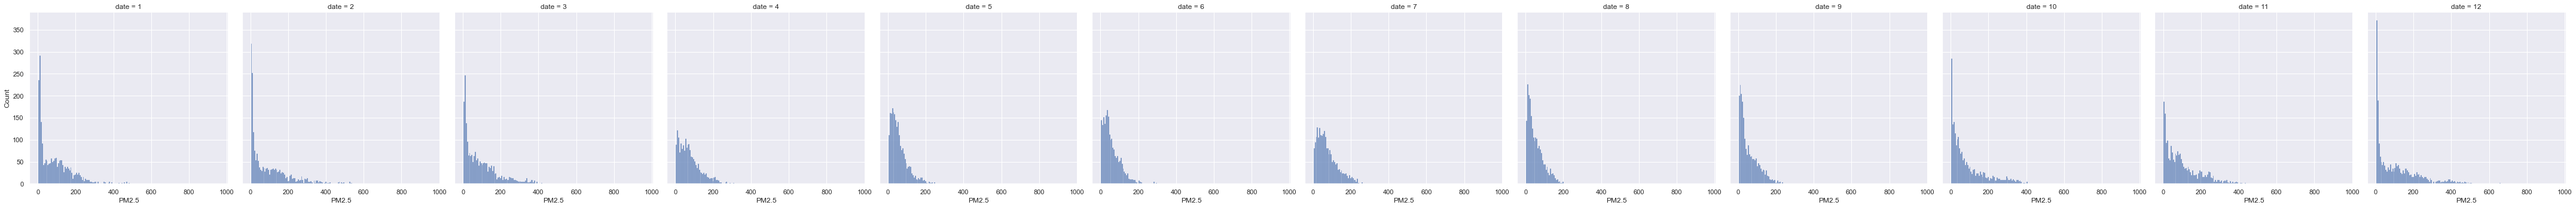

In [225]:
sns.displot(subset, x="PM2.5",col=subset.index.month)

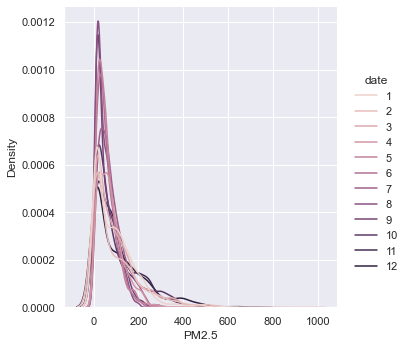

In [226]:
 sns.displot(subset, x="PM2.5",hue=subset.index.month, kind="kde")

In [228]:
result = adfuller(subset['PM2.5'].dropna())

In [229]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.512032
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [241]:
subset.index.year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='date', length=25505)

In [245]:
subset

,CO,NO2,O3,PM10,PM2.5,SO2
date,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,152.0,57.0,NaN
2014-01-01 01:00:00,NaN,NaN,NaN,179.0,68.0,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,240.0,81.0,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,229.0,95.0,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,206.0,95.0,NaN
...,...,...,...,...,...,...
2016-12-29 05:00:00,1.0,59.0,8.0,NaN,12.0,10.0
2016-12-29 06:00:00,0.8,52.0,18.0,18.0,13.0,11.0
2016-12-29 07:00:00,0.8,55.0,15.0,30.0,14.0,12.0


In [259]:
subset.groupby([subset.index.hour,subset.index.month])["PM2.5"].mean()

date  date
0     1       123.813978
      2       108.270238
      3        98.785714
      4        70.872727
      5        60.705376
                 ...    
23    8        54.840659
      9        63.657955
      10       99.187778
      11      123.315730
      12      135.822989
Name: PM2.5, Length: 288, dtype: float64

<AxesSubplot:xlabel='date', ylabel='PM2.5'>

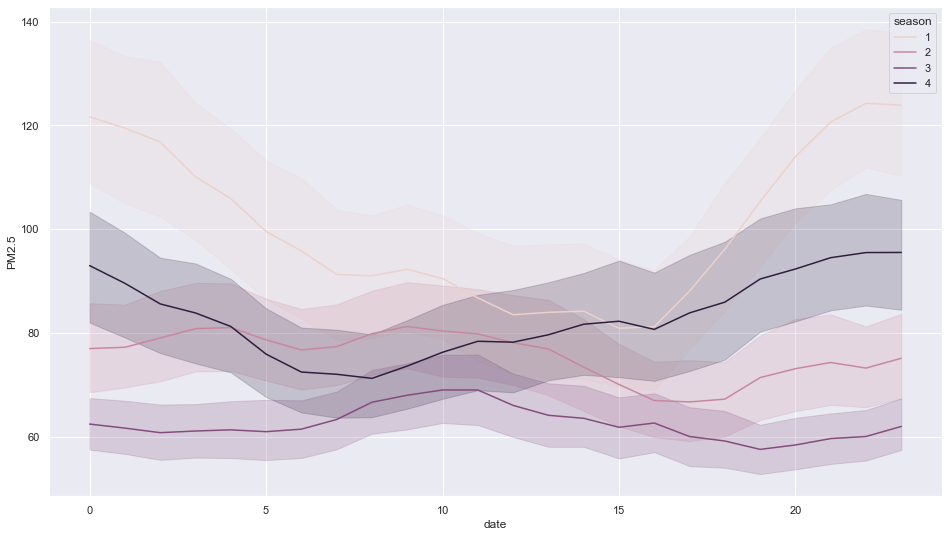

In [266]:
sns.set(rc={'figure.figsize':(16,9)})
subset['season']=subset.index.month%12 // 3 + 1 
sns.lineplot(data=subset, x=subset.index.hour, y="PM2.5",hue="season")

In [267]:
subset = subset.drop(columns=["season"])

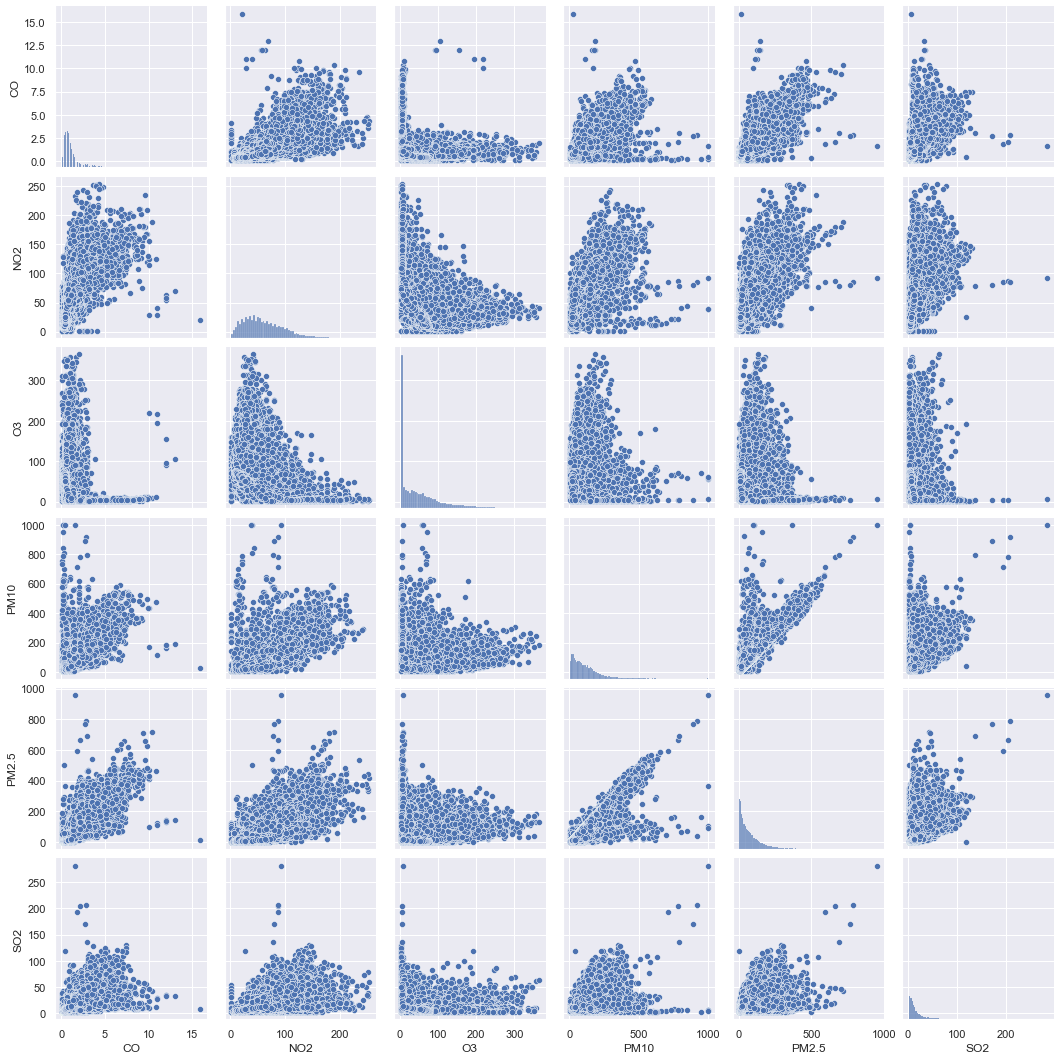

In [272]:
sns.pairplot(subset)

In [270]:
subset.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=25505)

In [278]:
pd.date_range(start = df.index.min(), end = df.index.max(), freq = 'H').difference(df.index)

DatetimeIndex(['2014-01-01 01:00:00', '2014-01-01 02:00:00',
               '2014-01-01 03:00:00', '2014-01-01 04:00:00',
               '2014-01-01 05:00:00', '2014-01-01 06:00:00',
               '2014-01-01 07:00:00', '2014-01-01 08:00:00',
               '2014-01-01 09:00:00', '2014-01-01 10:00:00',
               ...
               '2016-12-28 14:00:00', '2016-12-28 15:00:00',
               '2016-12-28 16:00:00', '2016-12-28 17:00:00',
               '2016-12-28 18:00:00', '2016-12-28 19:00:00',
               '2016-12-28 20:00:00', '2016-12-28 21:00:00',
               '2016-12-28 22:00:00', '2016-12-28 23:00:00'],
              dtype='datetime64[ns]', length=25146, freq=None)

In [284]:
pd.date_range(start = subset.index.min(), end = subset.index.max(), freq = 'H').difference(subset.index)

DatetimeIndex(['2014-01-09 09:00:00', '2014-01-21 12:00:00',
               '2014-01-22 10:00:00', '2014-01-25 09:00:00',
               '2014-01-25 19:00:00', '2014-01-25 20:00:00',
               '2014-01-25 21:00:00', '2014-01-25 22:00:00',
               '2014-02-08 15:00:00', '2014-02-08 17:00:00',
               ...
               '2016-12-27 02:00:00', '2016-12-27 04:00:00',
               '2016-12-27 05:00:00', '2016-12-27 06:00:00',
               '2016-12-27 07:00:00', '2016-12-27 08:00:00',
               '2016-12-27 09:00:00', '2016-12-27 10:00:00',
               '2016-12-27 11:00:00', '2016-12-27 15:00:00'],
              dtype='datetime64[ns]', length=737, freq=None)

In [32]:
# from fancyimpute import knn
# from rpy2.robjects.packages import importr
# # imputeTS = importr("imputeTS")
# # kalman_StructTs = robjects.r['na.kalman']
# # kalman_auto_arima = robjects.r['na.kalman']

In [33]:
# !pip install fancyimpute

In [34]:
# from fancyimpute import knn

In [35]:
# !pip install rpy2 --upgrade

In [36]:
# import importlib
# importlib.reload(rpy2)
# # import rpy2
# print(rpy2.__version__)

In [37]:
# os.environ['R_HOME'] = r'C:\Program Files\R\R-4.1.2'

In [38]:
# !python -m rpy2.situation

In [39]:
# from rpy2.robjects.packages import importr

<AxesSubplot:xlabel='date'>

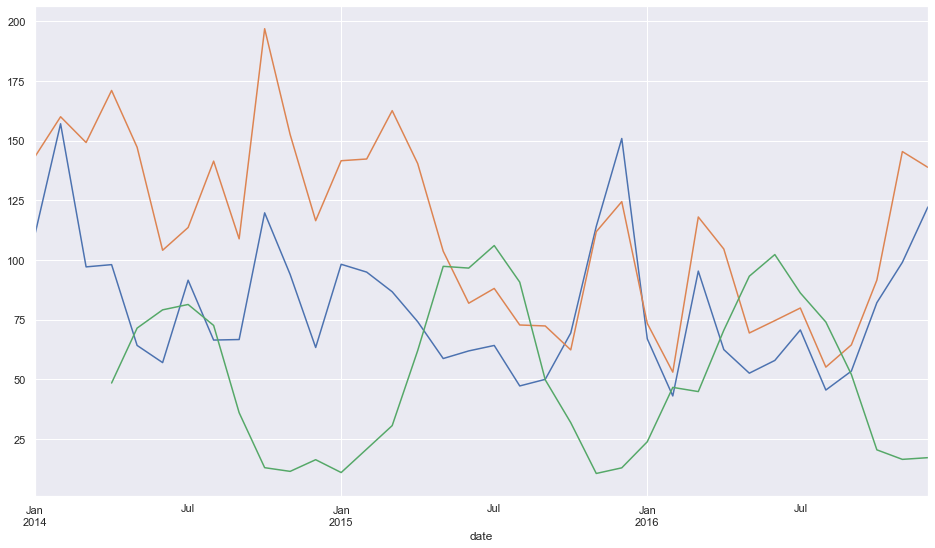

In [324]:
subset["PM2.5"].resample("M").mean().plot( label="PM2.5 Monthly average")
subset["PM10"].resample("M").mean().plot( label="PM10 Monthly average")
subset["O3"].resample("M").mean().plot( label="O3 Monthly average")

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
# print(result.trend)
# rint(result.seasonal)
# print(result.resid)
# print(result.observed)

<AxesSubplot:xlabel='date'>

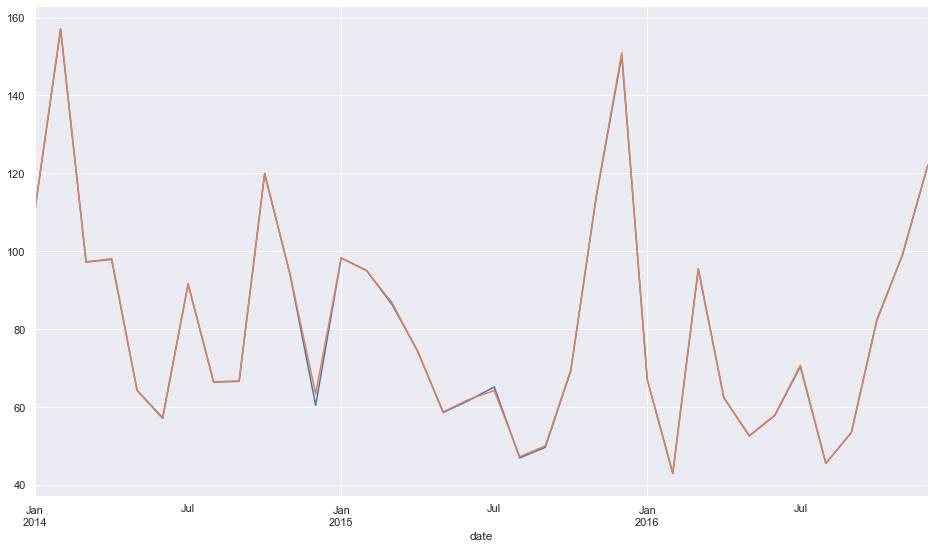

In [374]:
subset["PM2.5"].interpolate(method='polynomial', order=3).resample("M").mean().plot(label="PM2.5 Monthly average")
subset["PM2.5"].resample("M").mean().plot( label="PM2.5 Monthly average")

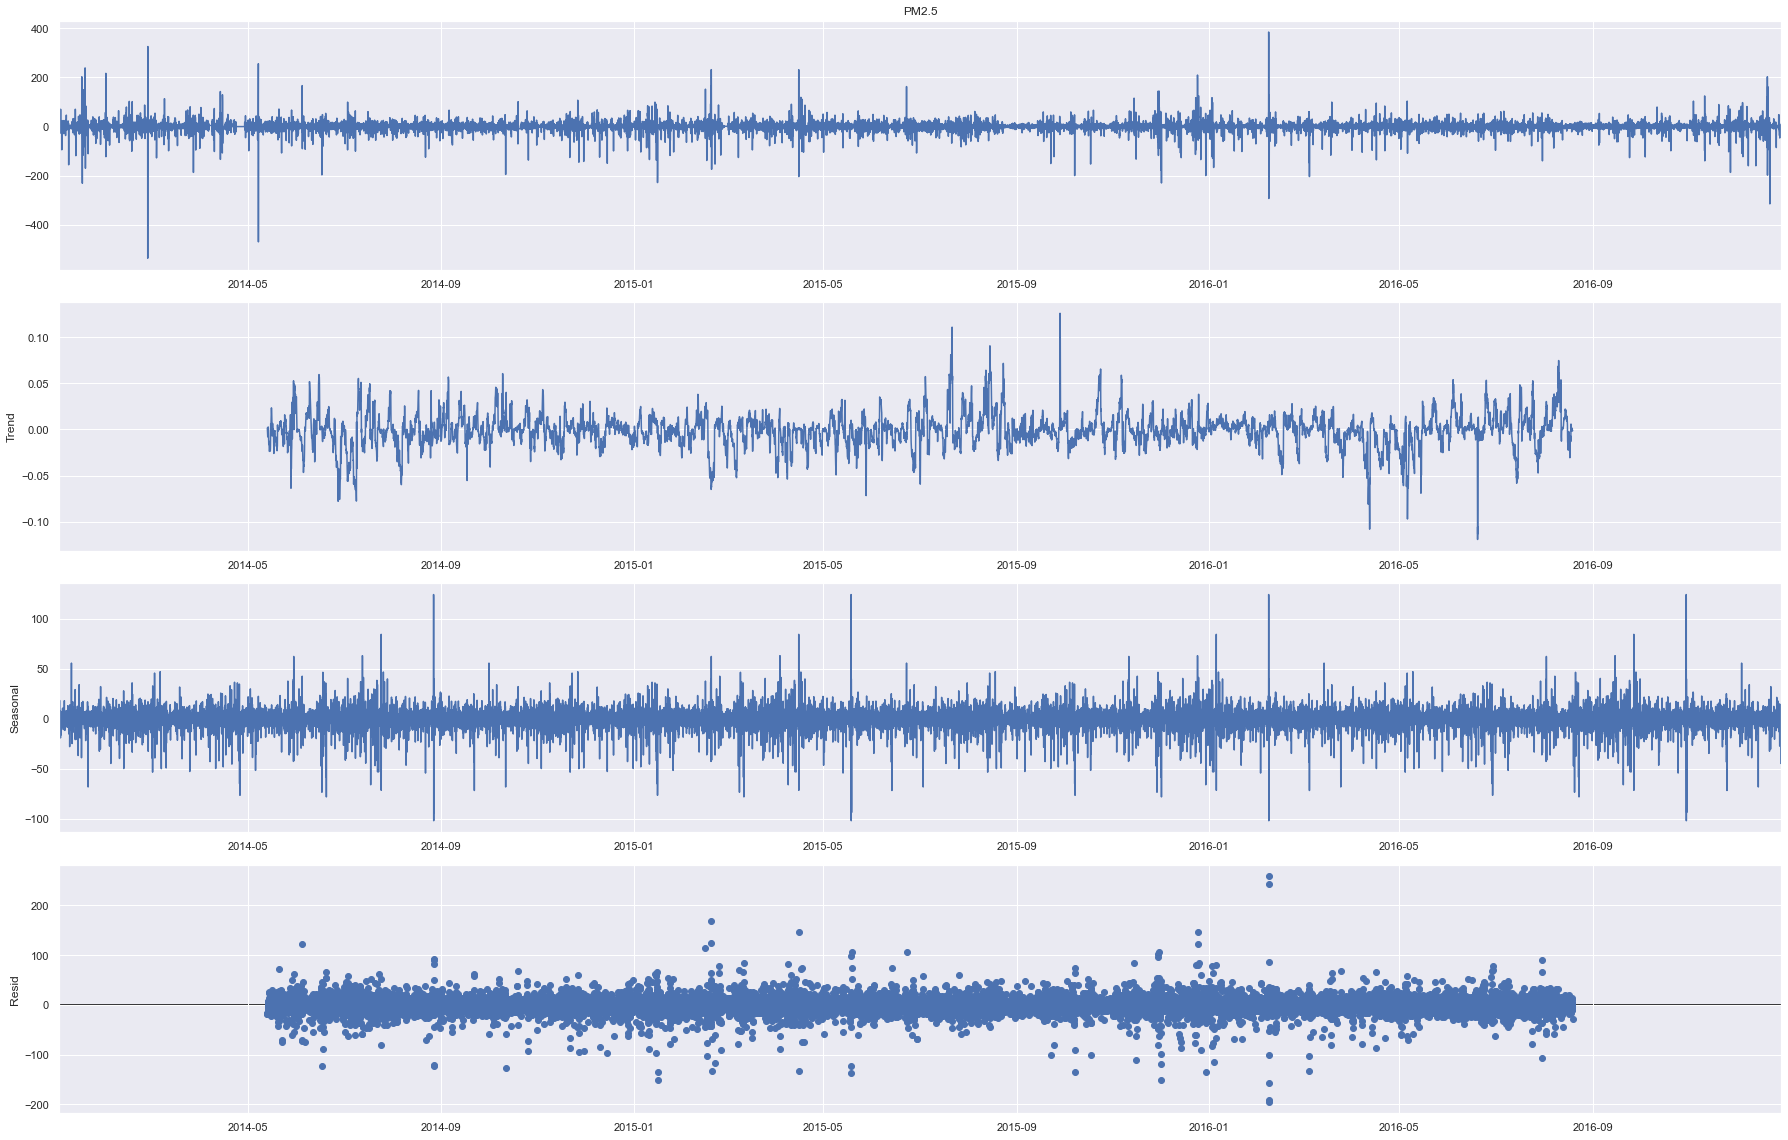

In [65]:
p="PM2.5"
tmp = (subset[p].asfreq('H').interpolate(method='linear')-subset[p].asfreq('H').interpolate(method='linear').shift(1)).dropna()
result = seasonal_decompose(tmp, model='additive',period=24*265)
result.plot()
plt.show()

In [58]:
result = seasonal_decompose(subset[p].asfreq('H').interpolate(method='linear').dropna(), model='additive',period=24*265)

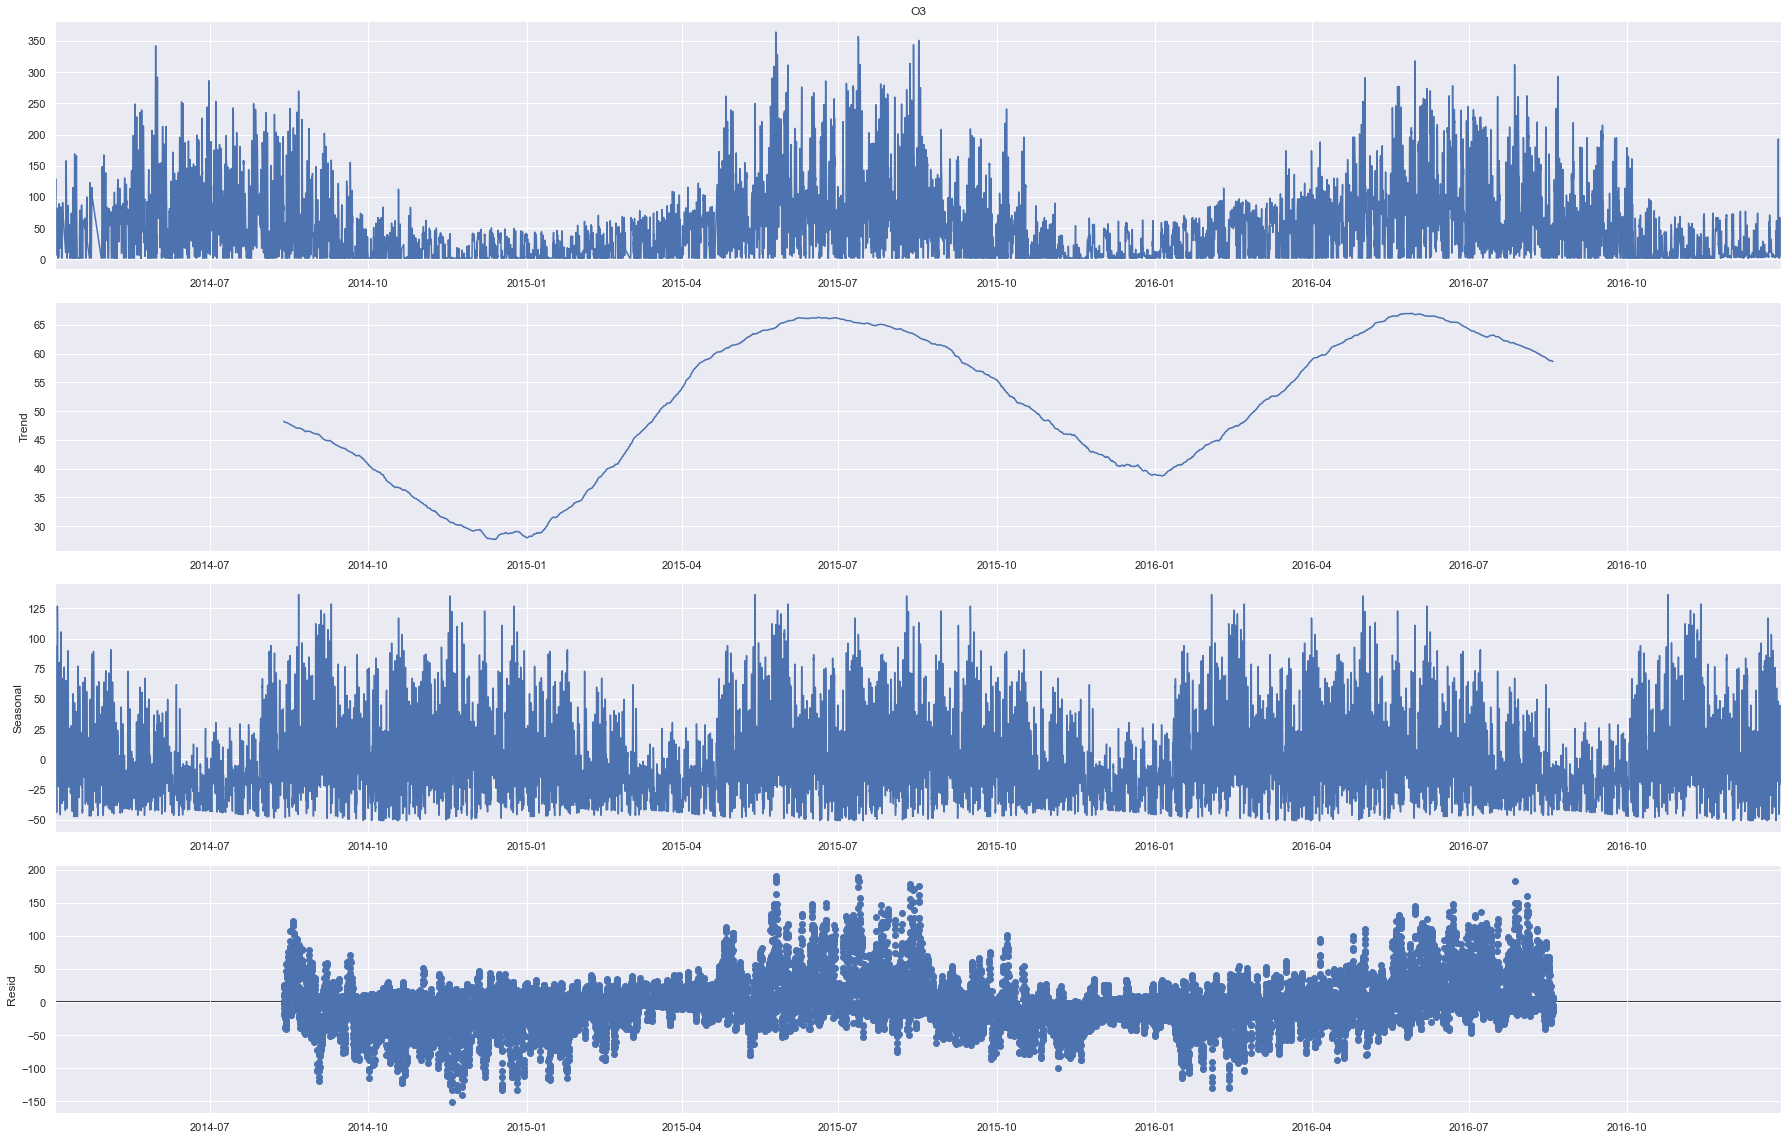

In [59]:
result.plot()
plt.show()

<AxesSubplot:xlabel='Datetime'>

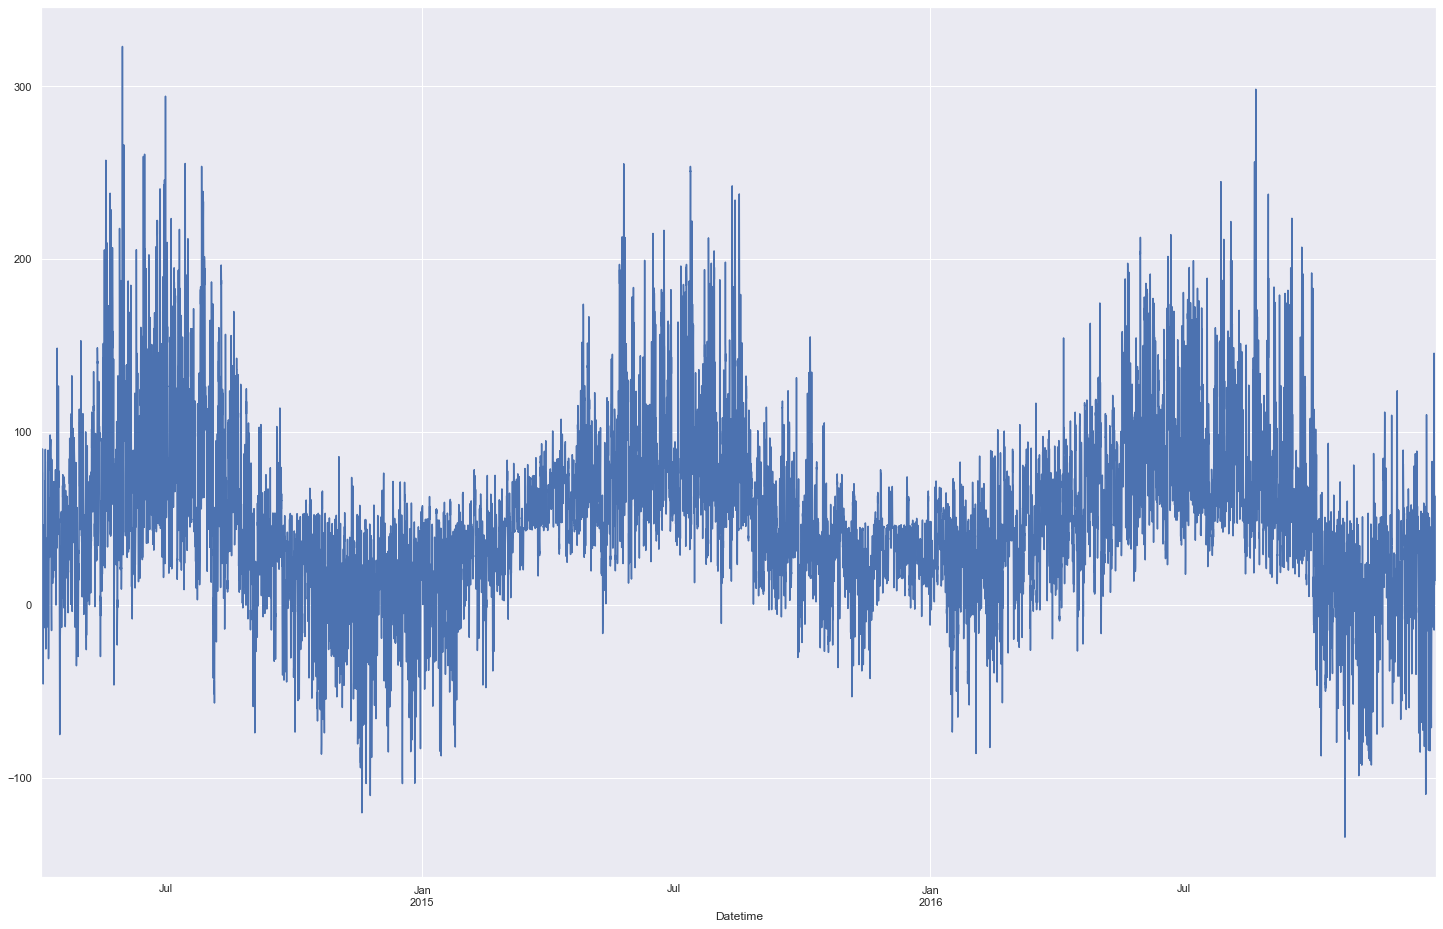

In [63]:
(subset[p].asfreq('H').interpolate(method='linear').dropna()-result.seasonal).plot()

In [330]:
subset["PM2.5"].asfreq('h')

date
2014-01-01 00:00:00    57.0
2014-01-01 01:00:00    68.0
2014-01-01 02:00:00    81.0
2014-01-01 03:00:00    95.0
2014-01-01 04:00:00    95.0
                       ... 
2016-12-29 05:00:00    12.0
2016-12-29 06:00:00    13.0
2016-12-29 07:00:00    14.0
2016-12-29 08:00:00    14.0
2016-12-29 09:00:00    19.0
Freq: H, Name: PM2.5, Length: 26242, dtype: float64

In [359]:
lot_return = np.log(subset['PM2.5']/subset['PM2.5'].shift(1))

In [367]:
subset["PM2.5"].asfreq('H')

date
2014-01-01 00:00:00    57.0
2014-01-01 01:00:00    68.0
2014-01-01 02:00:00    81.0
2014-01-01 03:00:00    95.0
2014-01-01 04:00:00    95.0
                       ... 
2016-12-29 05:00:00    12.0
2016-12-29 06:00:00    13.0
2016-12-29 07:00:00    14.0
2016-12-29 08:00:00    14.0
2016-12-29 09:00:00    19.0
Freq: H, Name: PM2.5, Length: 26242, dtype: float64

In [368]:
subset["PM2.5"]

date
2014-01-01 00:00:00    57.0
2014-01-01 01:00:00    68.0
2014-01-01 02:00:00    81.0
2014-01-01 03:00:00    95.0
2014-01-01 04:00:00    95.0
                       ... 
2016-12-29 05:00:00    12.0
2016-12-29 06:00:00    13.0
2016-12-29 07:00:00    14.0
2016-12-29 08:00:00    14.0
2016-12-29 09:00:00    19.0
Name: PM2.5, Length: 25505, dtype: float64

In [369]:
subset["PM10"]

date
2014-01-01 00:00:00    152.0
2014-01-01 01:00:00    179.0
2014-01-01 02:00:00    240.0
2014-01-01 03:00:00    229.0
2014-01-01 04:00:00    206.0
                       ...  
2016-12-29 05:00:00      NaN
2016-12-29 06:00:00     18.0
2016-12-29 07:00:00     30.0
2016-12-29 08:00:00     42.0
2016-12-29 09:00:00      NaN
Name: PM10, Length: 25505, dtype: float64

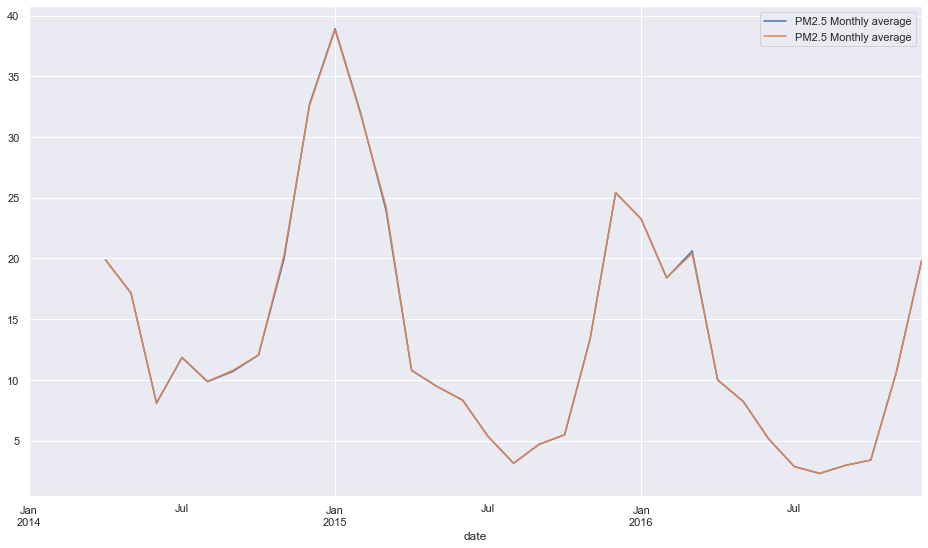

In [391]:
subset["SO2"].interpolate(method='linear').resample("M").mean().plot(label="PM2.5 Monthly average")
subset["SO2"].resample("M").mean().plot( label="PM2.5 Monthly average")
plt.legend()

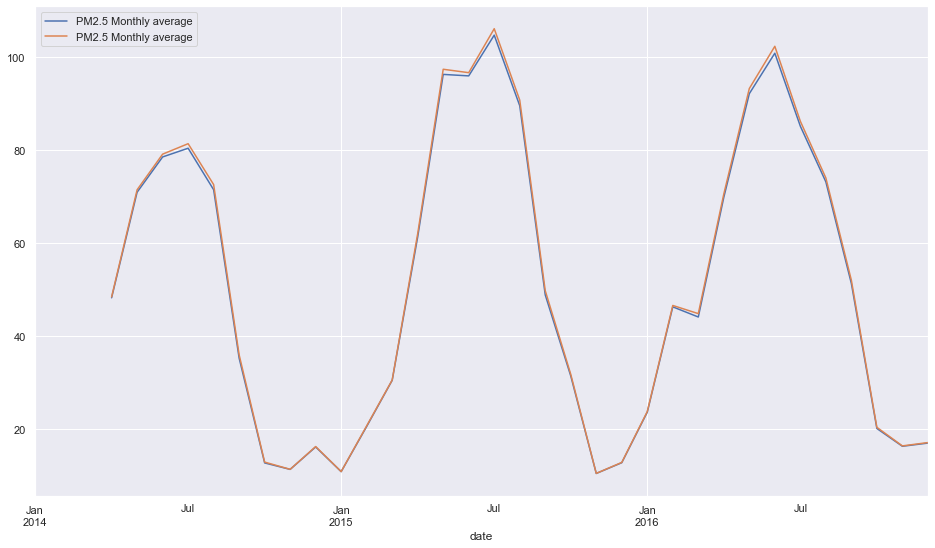

In [382]:
subset["O3"].interpolate(method='linear').resample("M").mean().plot(label="PM2.5 Monthly average")
subset["O3"].resample("M").mean().plot( label="PM2.5 Monthly average")
plt.legend()

In [396]:
subset_interpolated = subset.asfreq('H').interpolate(method='linear')

In [398]:
subset_interpolated_noNA = subset_interpolated.dropna()

In [399]:
subset_interpolated_noNA

,CO,NO2,O3,PM10,PM2.5,SO2
date,,,,,,
2014-04-02 12:00:00,1.0,61.0,95.0,13.0,66.0,15.0
2014-04-02 13:00:00,1.0,58.0,109.0,66.0,52.0,14.0
2014-04-02 14:00:00,1.0,58.0,121.0,125.0,65.0,16.0
2014-04-02 15:00:00,1.0,64.0,125.0,188.0,102.0,24.0
2014-04-02 16:00:00,2.0,67.0,129.0,157.0,108.0,30.0
...,...,...,...,...,...,...
2016-12-29 05:00:00,1.0,59.0,8.0,19.0,12.0,10.0
2016-12-29 06:00:00,0.8,52.0,18.0,18.0,13.0,11.0
2016-12-29 07:00:00,0.8,55.0,15.0,30.0,14.0,12.0


In [401]:
result = seasonal_decompose(subset_interpolated_noNA["O3"], model='additive',period=8640)

In [404]:
deseasonalized = subset_interpolated_noNA.O3 - result.seasonal

<AxesSubplot:xlabel='date'>

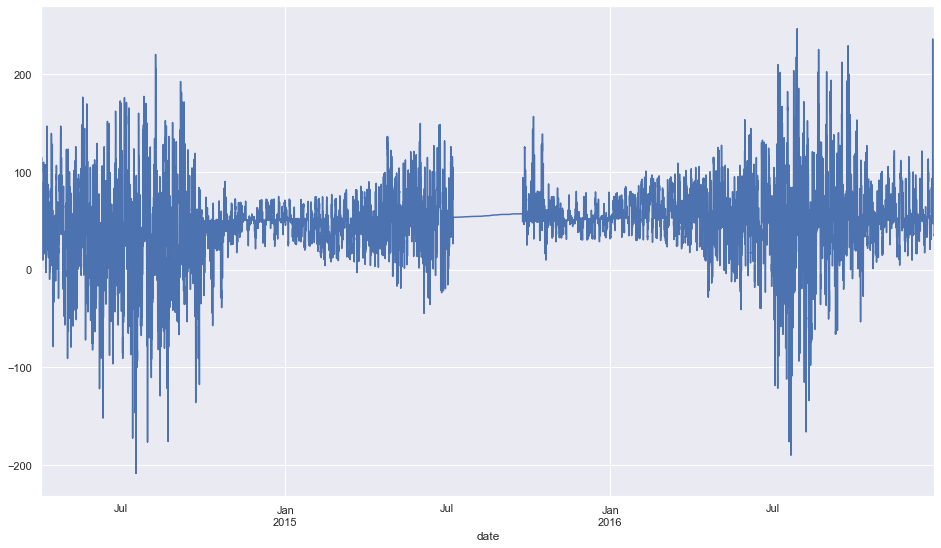

In [409]:
deseasonalized.plot()

In [411]:
from statsmodels.tsa.stattools import adfuller, kpss

In [424]:
result = adfuller(subset_interpolated_noNA["SO2"].resample("D").mean(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.218103534624266
p-value: 0.1997406492849087
Critial Values:
   1%, -3.4370266558635914
Critial Values:
   5%, -2.864487711945291
Critial Values:
   10%, -2.5683395116993872


<AxesSubplot:xlabel='date'>

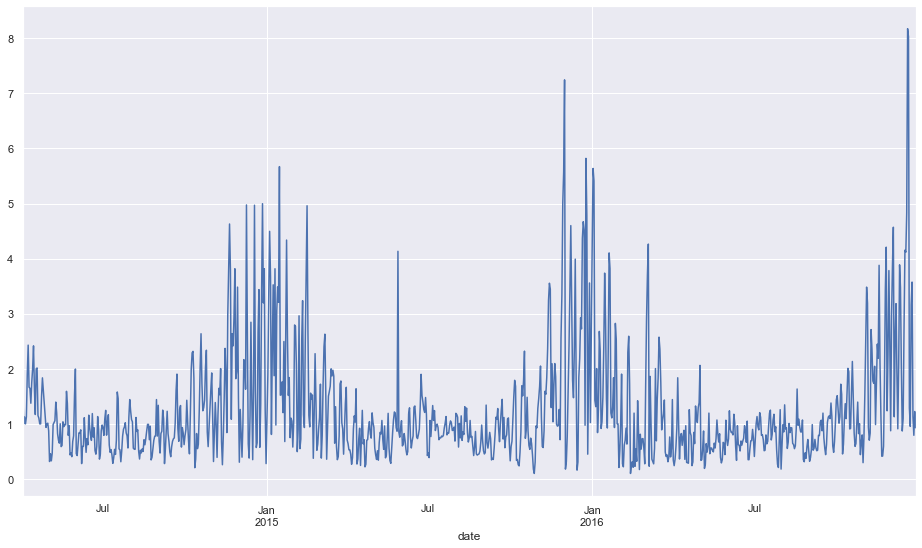

In [425]:
subset_interpolated_noNA["SO2"].resample("D").mean().plot()

In [426]:
# import statsmodels.api as sm

# daily_components = sm.tsa.seasonal_decompose(raw_series, period=24)
# weekly_components= sm.tsa.seasonal_decompose(raw_series, period=24*7)

# adjusted = raw_series - daily_components.seasonal - weekly_components.seasonal

# Electric load typically exhibits intra-daily seasonality, as well as intra-weekly seasonality (weekends have different power demand patterns than weekdays), plus yearly seasonality (high power demands for heating in winter, higher power demands for air conditioning in summer). Plus time-shifting holidays.

In [464]:
#for O3
subset_interpolated_noNA_log = np.log(subset_interpolated_noNA/subset_interpolated_noNA.shift(1)).dropna()
#extracting daily seasonality from raw time series

sd_24 = seasonal_decompose(subset_interpolated_noNA["PM2.5"], period=24)

#extracting weekly seasonality from time series adjusted by daily seasonality
sd_168 = seasonal_decompose(subset_interpolated_noNA["PM2.5"] - sd_24.seasonal, period=24*7)

#extracting yearly seasonality from time series adjusted by daily and weekly seasonality
sd_8766 = seasonal_decompose(subset_interpolated_noNA["PM2.5"] - sd_168.seasonal, period=24*365)

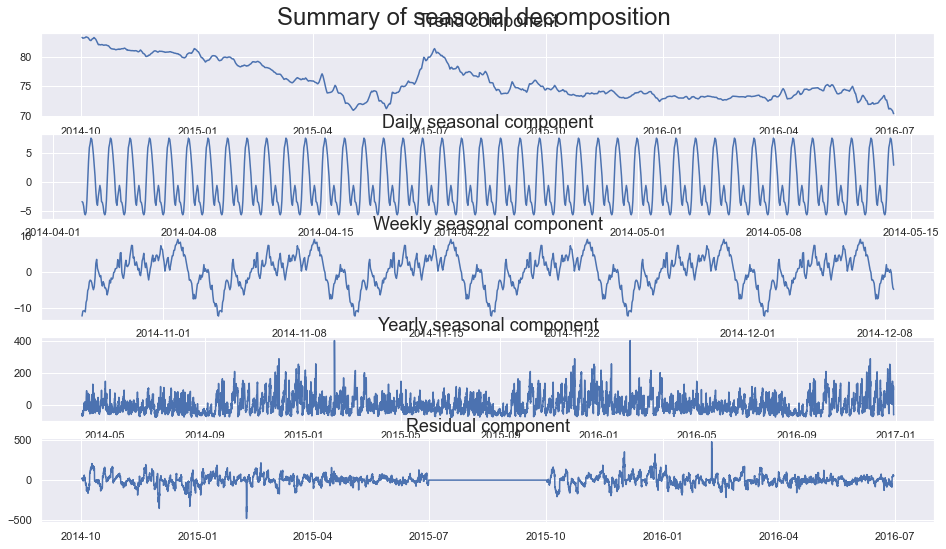

In [465]:
#drawing figure with subplots, predefined size and resolution
f, axes = plt.subplots(5,1)#,figsize=(12,18),dpi=200);

#setting figure title and adjusting title position and size
plt.suptitle('Summary of seasonal decomposition', y=0.92, fontsize=24);

#plotting trend component
axes[0].plot(sd_8766.trend)
axes[0].set_title('Trend component', fontdict={'fontsize': 18});

# #drawing black dashed vertical lines between y axis limits
# axes[0].vlines(datetime.datetime(2008,1,1), axes[0].get_ylim()[0], axes[0].get_ylim()[1], colors='black', linestyles='dashed');
# axes[0].vlines(datetime.datetime(2011,1,1), axes[0].get_ylim()[0], axes[0].get_ylim()[1], colors='black', linestyles='dashed');

# #placing three comments in text boxes
# axes[0].text(datetime.datetime(2006,6,1), 15000, 'Increasing trend',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'));
# axes[0].text(datetime.datetime(2009,8,1), 14750, 'Global Financial Crisis \n (GFC) and recovery',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'));
# axes[0].text(datetime.datetime(2015,1,1), 16000, 'Decreasing trend',
#              ha='center', va='center', bbox=dict(fc='white', ec='b', boxstyle='round'));

#plotting daily seasonal component
axes[1].plot(sd_24.seasonal[:1000]);
# axes[1].plot(sd_24.seasonal);

axes[1].set_title('Daily seasonal component', fontdict={'fontsize': 18});


# axes[1].annotate('Higher \n daytime values', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.9, 0.9),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'));
# axes[1].annotate('Lower \n nighttime values', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.9, 0.1),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'));

#plotting weekly seasonal component
# axes[2].plot(sd_168.seasonal);

axes[2].plot(sd_168.seasonal[5000:6000]);
axes[2].set_title('Weekly seasonal component', fontdict={'fontsize': 18});

# #placing comment in annotation with text box and arrow
# axes[2].annotate('Leaked daily \n seasonal effects', xy=(0.50, 0.75),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.50, 0.25),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='->',
#                             connectionstyle='arc3'));
# axes[2].annotate('Weekdays', xy=(0.20, 0.75),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.20, 0.40),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=45,
#                             connectionstyle='arc3'));
# axes[2].annotate('Weekends', xy=(0.28, 0.55),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.28, 0.90),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='-[',
#                             mutation_scale=17,
#                             connectionstyle='arc3'));

#plotting yearly seasonality
# axes[3].plot(sd_8766.seasonal[-30000:]);
axes[3].plot(sd_8766.seasonal);

axes[3].set_title('Yearly seasonal component', fontdict={'fontsize': 18});

# #placing comments in annotations with text boxes and arrows
# axes[3].annotate('Calendar effect', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.67, 0.9),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='->',
#                             connectionstyle='arc3'));
# axes[3].annotate('Leaked daily and \n weekly seasonal effects', xy=(0.34, 0.49),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.40, 0.90),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='w', ec='b'),
#             arrowprops=dict(color='black',
#                             arrowstyle='->',
#                             connectionstyle='arc3'));
# axes[3].annotate('Summer', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.68, 0.05),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='#f5f88f', ec='b'));
# axes[3].annotate('Autumn', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.74, 0.74),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='#f5f88f', ec='b'));
# axes[3].annotate('Winter', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.81, 0.05),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='#f5f88f', ec='b'));
# axes[3].annotate('Spring', xy=(0.54, 0.50),
#             xycoords='axes fraction',
#             va='center', ha='center',
#             xytext=(0.88, 0.74),
#             textcoords='axes fraction',
#             bbox=dict(boxstyle='round', fc='#f5f88f', ec='b'));

#plotting residual of decomposition
axes[4].plot(sd_8766.resid);
axes[4].set_title('Residual component', fontdict={'fontsize': 18});

# #setting label for each y axis
# for a in axes:
#     a.set_ylabel('MW');
    
# plt.show();

In [466]:
subset.iloc[(subset.index>'2015-08-10 00:00:00') & (subset.index<'2015-08-20 00:00:00')]

,CO,NO2,O3,PM10,PM2.5,SO2
date,,,,,,
2015-08-10 01:00:00,1.0,64.0,57.0,NaN,71.0,2.0
2015-08-10 02:00:00,0.9,52.0,52.0,117.0,81.0,2.0
2015-08-10 03:00:00,1.0,79.0,7.0,105.0,77.0,2.0
2015-08-10 04:00:00,1.1,81.0,NaN,84.0,73.0,2.0
2015-08-10 05:00:00,1.1,78.0,2.0,85.0,75.0,2.0
...,...,...,...,...,...,...
2015-08-19 19:00:00,0.8,37.0,153.0,63.0,54.0,2.0
2015-08-19 20:00:00,0.8,41.0,139.0,72.0,54.0,2.0
2015-08-19 21:00:00,0.9,59.0,80.0,89.0,76.0,2.0


In [469]:
sd_8766.resid.iloc[(sd_8766.resid.index>'2016-08-10 00:00:00') & (sd_8766.resid.index<'2016-08-30 00:00:00')]

date
2016-08-10 01:00:00   NaN
2016-08-10 02:00:00   NaN
2016-08-10 03:00:00   NaN
2016-08-10 04:00:00   NaN
2016-08-10 05:00:00   NaN
                       ..
2016-08-29 19:00:00   NaN
2016-08-29 20:00:00   NaN
2016-08-29 21:00:00   NaN
2016-08-29 22:00:00   NaN
2016-08-29 23:00:00   NaN
Freq: H, Name: resid, Length: 479, dtype: float64

In [ ]:
import statsmodels.api as sm

#Unobserved Components model definition
model_UC1 = sm.tsa.UnobservedComponents(subset_interpolated_noNA.O3,
                                        level='dtrend',
                                        irregular=True,
                                        stochastic_level = False,
                                        stochastic_trend = False,
                                        stochastic_freq_seasonal = [False, False, False],
                                        freq_seasonal=[{'period': 24},
                                                       {'period': 168},
                                                       {'period': 8766}])
#fitting model to train data
model_UC1res = model_UC1.fit()

#printing statsmodels summary for model
print(model_UC1res.summary())

print("")

#calculating mean absolute error and root mean squared error for in-sample prediction of model
print(f"In-sample mean absolute error (MAE): {'%.0f' % model_UC1res.mae}, In-sample root mean squared error (RMSE): {'%.0f' % np.sqrt(model_UC1res.mse)}")

#model forecast
forecast_UC1 = model_UC1res.forecast(steps=8766)


C:\Users\Yao\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:416: SpecificationWarning: Value of `irregular` may be overridden when the trend component is specified using a model string.
  % attribute, SpecificationWarning)


In [471]:
subset_interpolated_noNA.O3

date
2014-04-02 12:00:00     95.0
2014-04-02 13:00:00    109.0
2014-04-02 14:00:00    121.0
2014-04-02 15:00:00    125.0
2014-04-02 16:00:00    129.0
                       ...  
2016-12-29 05:00:00      8.0
2016-12-29 06:00:00     18.0
2016-12-29 07:00:00     15.0
2016-12-29 08:00:00      5.0
2016-12-29 09:00:00      8.0
Freq: H, Name: O3, Length: 24046, dtype: float64